# **Steam Game Analysis**

Welcome to our IND5003 project! In this project, we'll be analyzing a dataset of over 20,000 games listed on Steam and building a recommendation system for these games. 

The dataset includes details such as **name**, **category**, **price**, **rating**, and **genres** . Our goal is to understand player preferences, identify purchasing patterns, and develop a recommendation system to suggest games to users based on their interests. 

Our project will consist of the following steps:

**Data collection**: We'll collect the Steam games dataset from Kaggle.

**Data preparation**: We'll clean and preprocess the dataset for analysis.

**Exploratory data analysis**: We'll analyze the data to understand the distribution of games by categories, player ratings, and reviews.

**Data visualization**: We'll visualize the data to identify trends and patterns.

**Simples recommendation system**: We'll develop a recommendation system using machine learning algorithms to suggest games to users based on their interests and previous purchases.

## **1-Data collection**

Hey there! So, we're going to be working on a project that involves analyzing data from Steam - you know, the huge online game store? 

The dataset we'll be using has information on over 20000 games sold by Steam, like their names, categories, prices, and ratings. We're going to be digging into this data and figuring out what it all means, and how we can use it to help Steam and its customers.

For Steam, analyzing this data can help them understand which games are popular and which aren't, and they can use that information to figure out how to price and market things better. For players, having access to this data can help them decide what to buy - if they see that a game has good ratings and lots of positive reviews, they'll be more likely to buy it. 💸

So, we're going to be exploring this dataset, doing some cool data analysis and visualization, and even building a recommendation system based on the data. It's going to be pretty sweet, so let's get started! 

To access the dataset, simply go to Kaggle website: https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam

In [2]:
import pandas as pd

# load CSV file
steam = pd.read_csv("../data/steam.csv")

In [3]:
steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


## **2-Data preparation**

Before we dive into the data analysis and visualization, we need to make sure our dataset is clean and properly formatted. This process is called data preparation, and it involves several steps:

2.1 Data Inspection:
We'll start by inspecting the dataset to see if there are any missing values, duplicates, or inconsistent data. We'll also check if the data types are correct and make sure the dataset is ready for analysis.

2.2 Data Cleaning:
Next, we'll clean the dataset by removing or correcting any errors, inconsistencies, or irrelevant information. This will make the dataset more reliable and accurate.

2.3 Data Transformation:
After cleaning the dataset, we may need to transform the data to make it more useful for analysis. This can include scaling, normalization, or feature engineering.

2.4 Data Saving: Once we've prepared the data, we'll save it in a new file to avoid overwriting the original dataset. This way, we can always go back to the original dataset if we need to.

By following these steps, we can ensure that our data is clean, accurate, and ready for analysis! 

In [4]:
# check the number of rows and columns
steam.shape

(27075, 18)

In [5]:
# Define the check_missing_values function
def check_missing_values(dataframe):
    print(dataframe.isnull().sum())

# Call the check_missing_values function for the steam DataFrame
check_missing_values(steam)

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64


As there is no missing values of the dataset. In this case, we don't need to remove rows with missing values in the column.

In [6]:
# Check for duplicates
def check_duplicates(dataframe):
    return dataframe.duplicated().sum()

print(check_duplicates(steam))

0


In [7]:
# Check data types
def check_data_types(dataframe):
    return dataframe.dtypes

print(check_data_types(steam))

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object


Some variables in a dataset may have an object data type, which means they are strings while others have int or float data types which can be used for calculation later.

Now that we have adjusted the data types, let's create one more column that could be interesting to have in our database. **"rating_averaged"** because it can be created as a way of considering the average rating. This can help identify games with high customer satisfaction and many positive ratings compared to games with high average ratings but few raters.

In [8]:
# Calculate average rating
steam['total_value'] = steam['positive_ratings'] * 1 + steam['negative_ratings'] * -1
steam['total_ratings'] = steam['positive_ratings'] + steam['negative_ratings']
steam['average_ratings'] = steam['total_value'] / steam['total_ratings']

Extracting both the `genres` and `categories` from the column is important because it provides us with a clearer picture of how our games are distributed across different categories. By identifying the `genres` which is the main category, we can understand the broader classification of the game, while the `categories` which is the sub category tells us more specifically what the game is.

For example, if we have a main category of "Actions" and a sub category of "Multi-player", we know that this game falls under the larger umbrella of Action game and is specifically a multi-player merchanism. This information can be helpful in understanding the distribution of our games and identifying trends and patterns within specific categories.

Additionally, extracting both the `genres` and `categories` can also help with data visualization and communication. We can use these tags to identify categories to create more informative and concise charts and tables that show the distribution of games by category more clearly.

Overall, extracting both the `genres` and `categories` is an important step in our exploratory data analysis process that helps us gain a better understanding of our data and make more informed decisions.

In [9]:
steam['sub_category'] = steam['categories'].astype(str).str.split(';').str[0]
steam['main_category'] = steam['genres'].astype(str).str.split(';').str[0]

In [10]:
steam.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'total_value',
       'total_ratings', 'average_ratings', 'sub_category', 'main_category'],
      dtype='object')

In [11]:
len(steam)

27075

In [12]:
steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,negative_ratings,average_playtime,median_playtime,owners,price,total_value,total_ratings,average_ratings,sub_category,main_category
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,3339,17612,317,10000000-20000000,7.19,121195,127873,0.947776,Multi-player,Action
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,633,277,62,5000000-10000000,3.99,2685,3951,0.679575,Multi-player,Action
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,398,187,34,5000000-10000000,3.99,3018,3814,0.791295,Multi-player,Action
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,267,258,184,5000000-10000000,3.99,1006,1540,0.653247,Multi-player,Action
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,288,624,415,5000000-10000000,3.99,4962,5538,0.895991,Single-player,Action


## **3-Exploratory Data Analysis (EDA) + Data visualization**

In this step, we'll become data detectives and do some exploratory data analysis. We'll take a closer look at our data to understand how our games are distributed across categories , what the player ratings look like, and what players are saying in their reviews. Let's put on our detective hats and dive into the data!

3.1 Analyze the distribution of games by category using a bar plot.

3.2 Analyze the distribution of ratings using a histogram.

3.3 Perform statistical analysis to identify any correlations between different features, such as the relationship between game price and user rating.

3.4 Additional analysis & visualization on users data

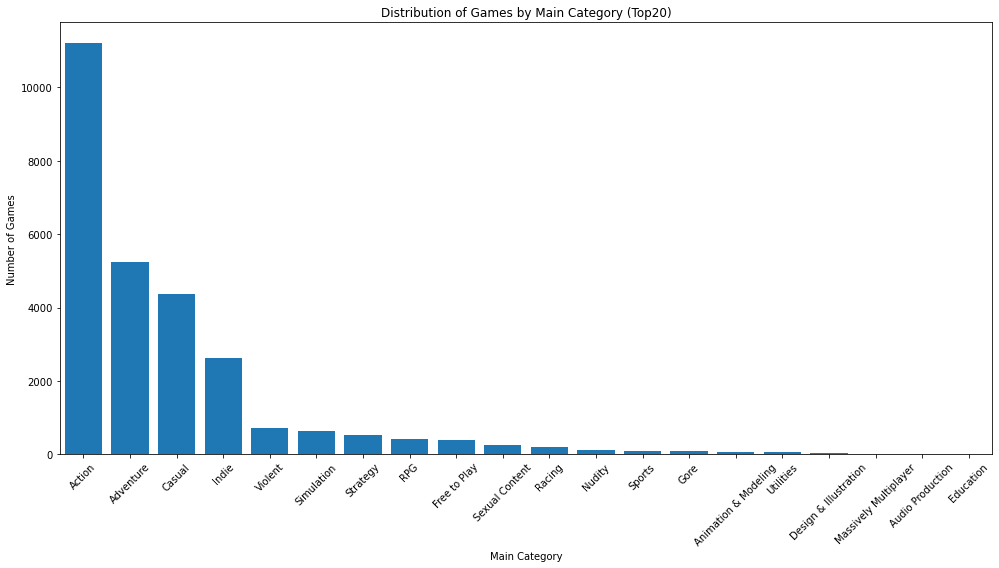

Top 10 main categories:
         Main Category  Number of Games
                Action            11212
             Adventure             5256
                Casual             4373
                 Indie             2623
               Violent              709
            Simulation              631
              Strategy              532
                   RPG              407
          Free to Play              395
        Sexual Content              245
                Racing              197
                Nudity              112
                Sports               83
                  Gore               81
  Animation & Modeling               66
             Utilities               60
 Design & Illustration               28
 Massively Multiplayer               16
      Audio Production               16
             Education               14


In [13]:
import matplotlib.pyplot as plt

# 3.1
# Analyzing distribution of games by main category
main_category_counts = steam['main_category'].value_counts()[:20] # Select only the top 20 main categories.
plt.figure(figsize=(14,8))
main_category_counts.plot(kind='bar', color='skyblue')
plt.bar(range(len(main_category_counts)), main_category_counts.values)
plt.ylabel('Number of Games')
plt.xlabel('Main Category')
plt.title('Distribution of Games by Main Category (Top20)')
plt.xticks(range(len(main_category_counts)), rotation=45)
plt.tight_layout()
plt.show()

# Top 20 main categories 
top_main_categories = pd.DataFrame({'Main Category': main_category_counts.index, 'Number of Games': main_category_counts.values})
print('Top 10 main categories:')
print(top_main_categories.to_string(index=False))

Based on the results, we can gather the following insights:

- The top four main categories are Action, Adventure, Casual and Indie. This shows that these categories are popular among users.

- The number of games in the other main categories is much lower, indicating that these categories are not as popular as the top four.

- Design & Illustration, Massively Multiplayer, Audio gameion and Education have a very small number of games, which may suggest that these categories have less demand.

- Overall, the data can help businesses understand the current market trends and identify potential opportunities for growth in specific categories.

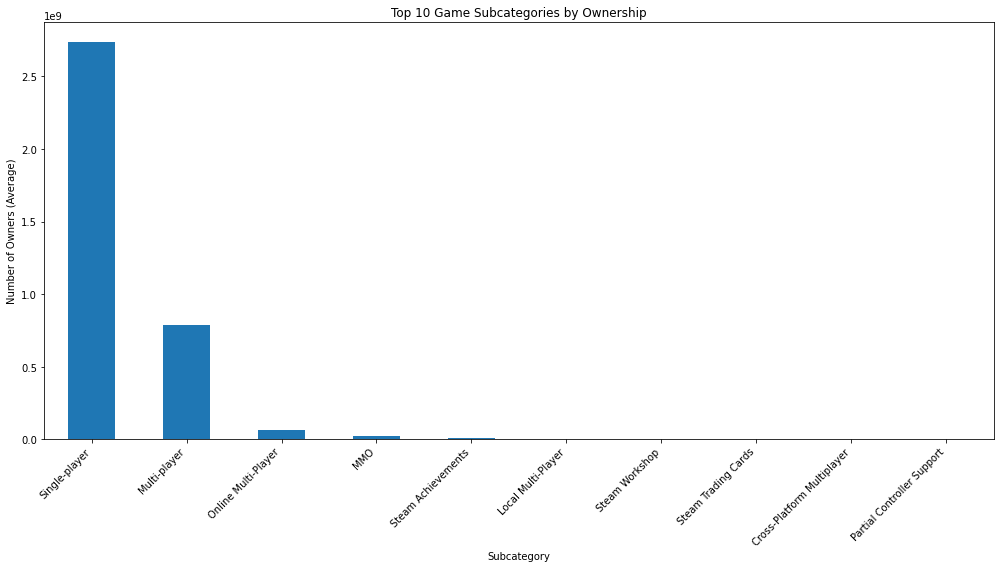

In [14]:
# Convert the 'owners' column to a representative number. We'll take the average of the range for simplicity.
steam['avg_owners'] = steam['owners'].str.split('-').apply(lambda x: (int(x[0]) + int(x[1])) / 2)

# Group by sub_category and sum the avg_owners
sub_category_ownership = steam.groupby('sub_category')['avg_owners'].sum().sort_values(ascending=False)

# Take the top 20 subcategories
top_20_sub_categories = sub_category_ownership.head(10)

# Plot the histogram
plt.figure(figsize=(14,8))
top_20_sub_categories.plot(kind='bar')
plt.title('Top 10 Game Subcategories by Ownership')
plt.ylabel('Number of Owners (Average)')
plt.xlabel('Subcategory')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Based on the results, we can gather the following insights:

- The top three subcategories are Single-player, Multi-player, Online Multi-Player. These are the most popular subcategories, and businesses could focus on providing games in these categories to attract players.

- Other popular subcategories include MMO, Steam Achievements. These subcategories may be less popular than the top three.

- The data shows that there is a concentrated range of subcategories in the top 10 for the **Single-player**.

- Overall, the data can help steam and businesses identify the most popular subcategories and adjust game offerings to meet player demand. By focusing on these subcategories, businesses could increase their sales and improve their competitiveness in the market.

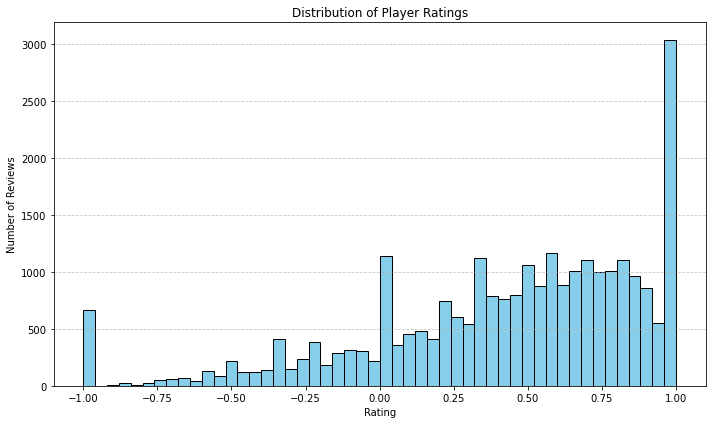

,Cluster,Number of Reviews
4,0-0.2,3163
3,0.2-0.4,3490
2,0.4-0.6,4660
1,0.6-0.8,5154
0,0.8-1,6372


In [15]:
# 3.2 Analyze the distribution of player ratings using a histogram.

# Plot histogram for average_ratings
plt.figure(figsize=(10,6))
plt.hist(steam['average_ratings'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Player Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create table with values per cluster
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]  # Adjusted bin edges for the range [0, 1]
steam['cluster'] = pd.cut(steam['average_ratings'], bins=bins, include_lowest=True, labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1'])
table = steam['cluster'].value_counts().reset_index().sort_values('index').rename(columns={'index': 'Cluster', 'cluster': 'Number of Reviews'})
table


- The majority of player ratings fall within the 0.6-0.8 and 0.8-1 range, with a total of 11,526 reviews.

- The lowest number of reviews is found in the 0-0.2 range, indicating that there may be room for improvement in terms of player satisfaction.

- Overall, the distribution of player ratings suggests that most players are satisfied with the games, but there may be opportunities for improvement to increase the number of positive ratings.

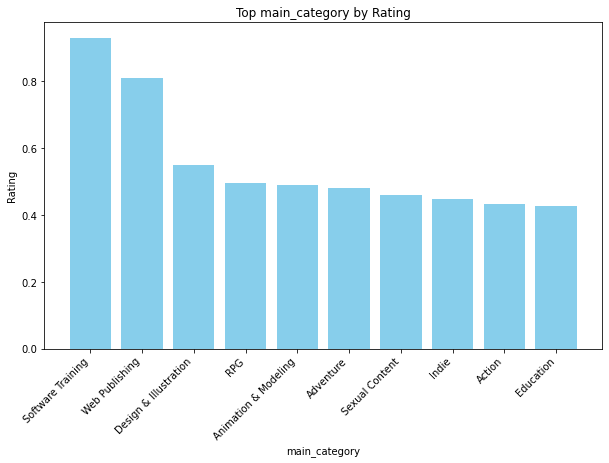

            main_category  average_ratings
0       Software Training         0.930070
1          Web Publishing         0.811111
2   Design & Illustration         0.550385
3                     RPG         0.495817
4    Animation & Modeling         0.488396
5               Adventure         0.479748
6          Sexual Content         0.460426
7                   Indie         0.448265
8                  Action         0.432224
9               Education         0.426991
10                 Casual         0.418471
11               Strategy         0.409336
12              Utilities         0.346689
13       Video Production         0.345878
14           Free to Play         0.342534
15                 Racing         0.339853
16  Massively Multiplayer         0.332693
17             Accounting         0.316667
18                 Nudity         0.308791
19                   Gore         0.285205
20           Early Access         0.278766
21             Simulation         0.270283
22         

In [16]:
# Calculate the top main categories
top = steam.groupby(['main_category'])['average_ratings'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(top['main_category'], top['average_ratings'],color='skyblue')

# Add labels and title
plt.xlabel('main_category')
plt.ylabel('Rating')
plt.title('Top main_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()
ranking = steam.groupby('main_category')['average_ratings'].mean().sort_values(ascending=False).reset_index()
print(ranking)

- Looking at this table, we can see the main categories ranked by their average rating. 

- The main categories with the highest ratings are Software Training, Web Publishing, and Design & Illustration, with ratings above 0.5. This suggests that players are generally satisfied with the games offered in these categories.

- On the other hand, the main categories with lower ratings are Sports, Audio gameion, and Photo Editing, with ratings below 0.2. This could indicate areas where improvements could be made to better meet player expectations.

- Additionally, we can see that Software Training, Web Publishing, and Design & Illustration, with ratings above 0.5, which indicates that these categories are popular and well-liked by players who purchase them.

- Overall, this table provides valuable insights into the performance of different main categories and can help businesses make informed decisions to improve their offerings and satisfy their players.

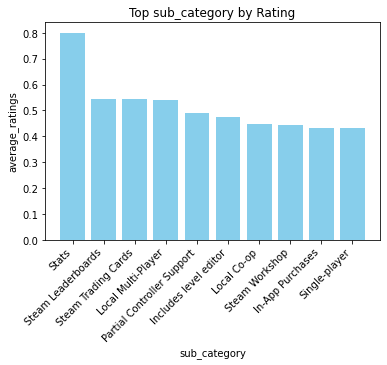

                  sub_category  average_ratings
0                        Stats         0.800000
1           Steam Leaderboards         0.545584
2          Steam Trading Cards         0.545164
3           Local Multi-Player         0.541212
4   Partial Controller Support         0.489531
5        Includes level editor         0.475045
6                  Local Co-op         0.447826
7               Steam Workshop         0.442065
8             In-App Purchases         0.433680
9                Single-player         0.433385
10         Shared/Split Screen         0.414434
11                 Steam Cloud         0.403057
12     Full controller support         0.392982
13         Includes Source SDK         0.357143
14  Cross-Platform Multiplayer         0.344926
15                Multi-player         0.343383
16          Steam Achievements         0.332929
17          Captions available         0.318516
18         Online Multi-Player         0.284841
19                       Co-op         0

In [17]:
# Calculate the top sub categories
top = steam.groupby(['sub_category'])['average_ratings'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.bar(top['sub_category'], top['average_ratings'],color='skyblue')

# Add labels and title
plt.xlabel('sub_category')
plt.ylabel('average_ratings')
plt.title('Top sub_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=45,ha='right')

# Show the plot
plt.show()
ranking = steam.groupby('sub_category')['average_ratings'].mean().sort_values(ascending=False).reset_index()
print(ranking)

- Looking at the table, we can see the top and bottom sub-categories in terms of player ratings.

- It's great to see that the "Stats" sub-category is at the top with a rating of 0.8, which indicates that players are satisfied with their purchase.

- However, there are some sub-categories at the bottom, such as "MMO", "Online Co-op", "VR Support", which have lower ratings, implying that players are not very happy with these games.

- Insights like these can help businesses focus on improving the quality of their games and enhancing the overall player experience. It's important to keep track of player feedback to identify areas for improvement and continue to meet their needs and expectations.

In [18]:
# 3.3 Perform statistical analysis to identify any correlations between different features, such as the relationship between game price and player ratings.
# Drop non-numeric columns
numeric_cols = steam.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

# Print the correlation matrix
print(correlation_matrix)


                     appid   english  required_age  achievements  \
appid             1.000000 -0.116878     -0.087740      0.040510   
english          -0.116878  1.000000      0.002860      0.014121   
required_age     -0.087740  0.002860      1.000000     -0.005459   
achievements      0.040510  0.014121     -0.005459      1.000000   
positive_ratings -0.070888  0.006001      0.060418      0.006058   
negative_ratings -0.052198  0.005705      0.057599      0.003578   
average_playtime -0.070236  0.000338      0.034423      0.014175   
median_playtime  -0.048308 -0.003416      0.014748      0.009957   
price            -0.152112  0.007716      0.120358     -0.007996   
total_value      -0.070315  0.005608      0.056410      0.006247   
total_ratings    -0.069987  0.006171      0.062154      0.005813   
average_ratings  -0.022049 -0.017599      0.010254     -0.022420   
avg_owners       -0.127310  0.010820      0.074438      0.003400   

                  positive_ratings  negative_ra

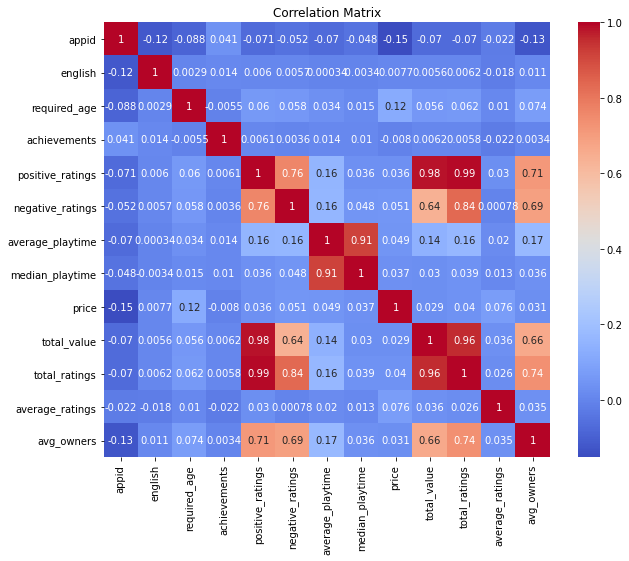

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

So, we have here a correlation table between some variables of our dataset.

- we can see a weak positive correlation between the total rating and average ratings. This suggests that games with higher ratings tend to have more reviews and higher average ratings.

- There is a moderate positive correlation (0.02) between the "average_playtime" and "price" variables, indicating that players may be more likely to rate a game higher if they spend more time on it.

- It's important to note that correlation doesn't necessarily imply causation, but these insights can help us understand the relationships between different features in our data.

The ideal proportion to consider a positive correlation as weak, moderate, or strong depends on the field of study and the specific research question. However, a general rule of thumb is:

A correlation coefficient (r) between 0.1 and 0.3 indicates a weak positive correlation.
A correlation coefficient (r) between 0.3 and 0.5 indicates a moderate positive correlation.
A correlation coefficient (r) greater than 0.5 indicates a strong positive correlation.

### **Data Analysis for User.csv**
`user.csv` only includes very few user characteristics, mainly user behavioral characteristics, including download and play time. So, in this part, we will conduct a brief data analysis and visualization of this data.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# load User CSV file
heads = ['ID', 'Game_name', 'Behaviour', 'Play_time', 'others']
user_data = pd.read_csv("../data/user.csv")
user_data.columns = heads
user_data.name = 'user'
nRow, nCol = user_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 199999 rows and 5 columns


In [23]:
user_data.head()

,ID,Game_name,Behaviour,Play_time,others
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [24]:
# 3.4 Additive analysis on users data
def plotCorrelationMatrix(data, graphWidth):
    """
    Plot Correlation Matrix of input data.
    Args:
        data: input data
        graphWidth: figsize
    """
    filename = data.name
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({data.shape[1]}) is less than 2')
        return
    corr = data.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [25]:
def plotPerColumnDistribution(data, nGraphShown, nGraphPerRow):
    """
    Distribution graphs (histogram/bar graph) of the given column data.
    Args:
        data: data frame
        nGraphShown: number of data columns to show
        nGraphPerRow: number of data in the row
    """
    nunique = data.nunique()
    # Pick columns that have between 1 and 50 unique values
    data = data[[col for col in data if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = data.shape
    columnNames = list(data)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = data.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i+1})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [26]:
def plotScatterMatrix(data, plotSize, textSize):
    """
    Plot Scatter Matrix
    Args:
        data: input Frame data
        plotSize: figsize
        textSize: textSize for annotation
    """
    data = data.select_dtypes(include =[np.number])               # keep only numerical columns
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data)
    if len(columnNames) > 10:                                     # reduce the number of columns
        columnNames = columnNames[:10]
    data = data[columnNames]
    ax = pd.plotting.scatter_matrix(data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [27]:
def Visulisation(data):
    """
    Visulisation bin/bar, scatter matrix.
    Args:
        data: input data
    """
    plotPerColumnDistribution(data, 10, 5)
    plotScatterMatrix(data, 9, 10)

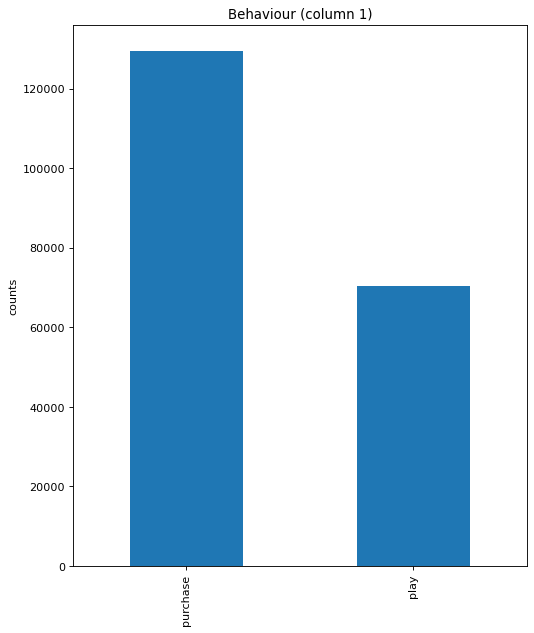

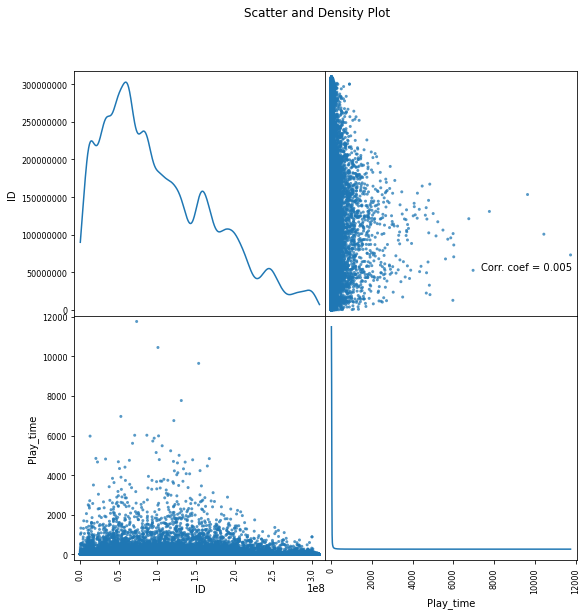

In [28]:
Visulisation(user_data)

**User Data Analysis Insights:**
- **Bin Plot of Users' Behaviors :** For users, there will be two behaviors, one is to download and play, and the other is to just download. From the above pie chart, we can clearly find that more users will download and play, which is in line with daily rules.
  
- **Scatter and Density Plot of Users' features :**
    - Correlation coefficient (Corr. coef): The value is 0.005, which is close to 0. This means there is almost no linear correlation between "ID" and "Play_time". This is in line with our general understanding.
      
    - In the scatter plot, most of the data points are concentrated in the lower left corner, which means that most of the IDs have short Play_time. In addition, there are also some data points scattered on the right and upper part of the graph, indicating that some IDs have longer Play_time.


Converting a column of strings to numbers is a common step in data analysis and machine learning, and it can be useful in several ways. 😃

First, many machine learning algorithms require numeric input data to work properly, so transforming the data can help ensure that the algorithm can process it correctly. 👨‍💻

Second, numeric data can be easier to work with than strings in some cases. For example, you can perform mathematical operations on numeric data, which can be useful in calculating things like averages, sums, and other statistics. 📊

In the context of a recommendation system, converting user IDs from strings to numbers can help simplify the calculation of similarity scores between users or items. This can improve the efficiency and accuracy of the recommendation system. 🚀

Overall, converting strings to numbers is a common and useful step in data analysis and machine learning, and it can be particularly helpful in improving the performance of recommendation systems. 🤖

## **4-Recommendation System**

After collecting and cleaning a dataset of over 20,000 games listed on Steam, we developed a recommendation system using machine learning algorithms to suggest games to users based on their interests and previous purchases. 

Now, let's take a look at some insights that can be extracted from our system and how they can be valuable for a company:

- Understanding user preferences: By analyzing the games that each user has purchased, we can identify which categories and features are more attractive to them. This information can be used to optimize game design and marketing strategies to better target specific groups of users.

- Increasing customer engagement: By suggesting relevant games to users based on their interests, we can increase their engagement with the platform and their satisfaction with the shopping & gaming experience. This can lead to higher user retention and loyalty.

- Improving sales: By recommending games that are similar or complementary to the ones that users have already purchased, we can increase the chances of cross-selling and up-selling. This can result in higher revenue and profit for the company.

**For the actual recommendation system, please refer to *'3-Recommendation System.ipynb'***   